## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [4]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
import torch.optim as optim
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:01<00:00, 6.22MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 280kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 4.55MB/s]


Text(0.5, 1.0, 'Image label: 2')

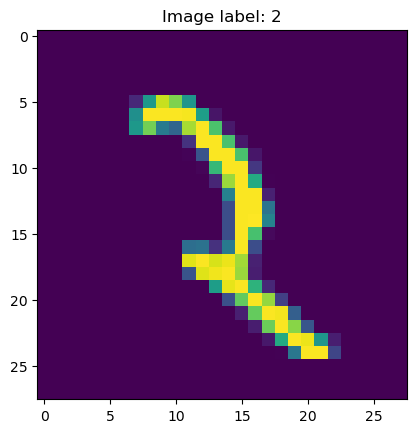

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST(
    ".", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_mnist_data = MNIST(
    ".", train=False, transform=torchvision.transforms.ToTensor(), download=True
)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data, batch_size=32, shuffle=True, num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data, batch_size=32, shuffle=False, num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f"Image label: {_label}")
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_data_loader:
        images = images.view(-1, 28 * 28).to(device) 
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_data_loader:
        images = images.view(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Epoch 1/5, Loss: 455.9328, Train Accuracy: 92.94%
Epoch 2/5, Loss: 177.1775, Train Accuracy: 97.06%
Epoch 3/5, Loss: 121.0162, Train Accuracy: 97.92%
Epoch 4/5, Loss: 88.3137, Train Accuracy: 98.54%
Epoch 5/5, Loss: 66.3736, Train Accuracy: 98.88%
Test Accuracy: 97.74%


Локальные тесты для проверки вашей модели доступны ниже:

In [6]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, "Please, use `model` variable to store your model"

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print("Something is wrong with the model")
    raise e


assert y_predicted.shape[-1] == 10, "Model should predict 10 logits/probas"

print("Everything seems fine!")
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [7]:
def get_optimizer(name, model, lr=0.001):
    if name == 'adam':
        return optim.Adam(model.parameters(), lr=lr)
    elif name == 'sgd':
        return optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    elif name == 'rmsprop':
        return optim.RMSprop(model.parameters(), lr=lr)
    elif name == 'adamw':
        return optim.AdamW(model.parameters(), lr=lr)
    else:
        raise ValueError("Неизвестный оптимизатор")

optimizer_name = 'adamw'
learning_rate = 0.001
optimizer = get_optimizer(optimizer_name, model, lr=learning_rate)

optimizers_to_try = ['adam', 'adamw', 'sgd', 'rmsprop']
results = {}

for opt_name in optimizers_to_try:
    print(f"\nОптимизатор: {opt_name}")
    model = MLP().to(device)
    optimizer = get_optimizer(opt_name, model, lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_data_loader:
            images = images.view(-1, 28 * 28).to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_data_loader:
            images = images.view(-1, 28 * 28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    results[opt_name] = test_accuracy
    print(f"Test Accuracy with {opt_name}: {test_accuracy:.2f}%")


Оптимизатор: adam
Epoch 1/5, Loss: 455.2234, Train Accuracy: 92.81%
Epoch 2/5, Loss: 180.3743, Train Accuracy: 97.00%
Epoch 3/5, Loss: 121.1085, Train Accuracy: 98.00%
Epoch 4/5, Loss: 90.0107, Train Accuracy: 98.43%
Epoch 5/5, Loss: 70.2241, Train Accuracy: 98.77%
Test Accuracy with adam: 97.69%

Оптимизатор: adamw
Epoch 1/5, Loss: 453.4860, Train Accuracy: 92.83%
Epoch 2/5, Loss: 176.3583, Train Accuracy: 97.09%
Epoch 3/5, Loss: 121.4779, Train Accuracy: 97.97%
Epoch 4/5, Loss: 87.9439, Train Accuracy: 98.48%
Epoch 5/5, Loss: 71.4745, Train Accuracy: 98.73%
Test Accuracy with adamw: 97.63%

Оптимизатор: sgd
Epoch 1/5, Loss: 2135.8499, Train Accuracy: 70.38%
Epoch 2/5, Loss: 702.7210, Train Accuracy: 89.38%
Epoch 3/5, Loss: 574.1647, Train Accuracy: 91.31%
Epoch 4/5, Loss: 498.9300, Train Accuracy: 92.33%
Epoch 5/5, Loss: 440.2336, Train Accuracy: 93.29%
Test Accuracy with sgd: 93.68%

Оптимизатор: rmsprop
Epoch 1/5, Loss: 383.5030, Train Accuracy: 93.74%
Epoch 2/5, Loss: 159.7420, T

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [8]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [9]:
print(f"Neural network accuracy on train set: {train_acc:3.5}")

Neural network accuracy on train set: 0.9929


In [10]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [11]:
print(f"Neural network accuracy on test set: {test_acc:3.5}")

Neural network accuracy on test set: 0.9788


Проверка, что необходимые пороги пройдены:

In [12]:
assert test_acc >= 0.92, "Test accuracy is below 0.92 threshold"
assert (
    train_acc >= 0.91
), "Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow"

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки.

In [13]:
# do not change the code in the block below
# __________start of block__________
import os
import json

assert os.path.exists(
    "hw07_data_dict.npy"
), "Please, download `hw07_data_dict.npy` and place it in the working directory"


def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx : idx + step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels_np = torch.cat(predicted_labels).numpy()
    predicted_labels_str = ",".join([str(x) for x in list(predicted_labels)])
    return predicted_labels_np, predicted_labels_str


loaded_data_dict = np.load("hw07_data_dict.npy", allow_pickle=True)

train_labels_np, train_labels_str = get_predictions(
    model, torch.FloatTensor(loaded_data_dict.item()["train"])
)
test_labels_np, test_labels_str = get_predictions(
    model, torch.FloatTensor(loaded_data_dict.item()["test"])
)

submission_dict_str = {
    "train": train_labels_str,
    "test": test_labels_str,
}

submission_dict_np = {
    "train": train_labels_np,
    "test": test_labels_np,
}

np.save("submission_dict_hw07.npy", submission_dict_np, allow_pickle=True)
with open("submission_dict_hw07.json", "w") as iofile:
    json.dump(submission_dict_str, iofile)
print("File saved to `submission_dict_hw07.json` and `submission_dict_hw07.npy`")
# __________end of block__________

File saved to `submission_dict_hw07.json` and `submission_dict_hw07.npy`


На этом задание завершено. Поздравляем!